# Utilities

## Imports

In [61]:
import time
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the plots with grey grid
sns.set(style="darkgrid")

## Test functions

In [62]:
def time_function(func, input):
    start = time.time()
    # Unpack the input list and call the function
    func(*input)
    end = time.time()
    return end - start

In [63]:
# Generate a random list of integers of a given length and range
def random_list(length, l_range, u_range):
    return [random.randint(l_range, u_range) for i in range(length)]    

# Exercises

## Exercise 1 - Sort by birth year

A company has a large database (thousands or more elements) of customers and it needs to sort them by birth year. For the sake of simplicity, we assume to have just an input list $years$ such that $years[i]$ is the birth year of customer $i$. Write a function to sort this list.

What is the best algorithm to solve this problem? In general, QuickSort and MergeSort are preferable due to their (average) time complexities.

We saw that in some cases there could be better algorithms. In this case, we have to deal with birth years of customers, so we can safely assume that the values we want to sort belongs to a quite small range ($\approx$ 100 years). In such cases, CountingSort is particularly suitable due to its time complexity.

### Solution

Let $n$ be the length of our list and $k$ be the range of the input values

In [64]:
def counting_sort(arr):
    # Find maximum and minimum values
    max_val = max(arr) # O(n)
    min_val = min(arr) # O(n)
    # Create a list to store the count of each element
    count = [0] * (max_val - min_val + 1) # O(k) 
    # Count the occurrences of each element 
    for i in arr: # O(n)
        count[i - min_val] += 1
    # Reconstruct the array
    index = 0 
    # O(n) the two nested loops together
    for i in range(len(count)):
        for j in range(count[i]):
            arr[index] = i + min_val
            index += 1
    return arr

In [65]:
# Check the correctness of the two functions
def test():
    # Generate 100 random lists of integers of random length between 1 and 10000
    for _ in range(100):
        lst = random_list(random.randint(1, 10000), 0, 1000000)
        assert counting_sort(lst) == sorted(lst)

In [66]:
test()

Is it actually good? Let's compare it with an asymptotically-optimal comparison-based sorting algorithm

In [67]:
def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        left = arr[:mid]
        right = arr[mid:]
        merge_sort(left)
        merge_sort(right)
        i = j = k = 0
        while i < len(left) and j < len(right):
            if left[i] < right[j]:
                arr[k] = left[i]
                i += 1
            else:
                arr[k] = right[j]
                j += 1
            k += 1
        while i < len(left):
            arr[k] = left[i]
            i += 1
            k += 1
        while j < len(right):
            arr[k] = right[j]
            j += 1
            k += 1
    return arr

In [68]:
# Test both functions on random lists of different lengths. For each length, we average over n_trials runs.
lengths = list(range(100, 1000, 200)) + list(range(1000, 10001, 1000))
ms_times = []
cs_times = []
n_trials = 50
for length in lengths:
    # Generate random lists without repetitions
    lst = random_list(length, 1900, 2024)
    ms_time = 0
    cs_time = 0
    for _ in range(n_trials):
        ms_time += time_function(merge_sort, [lst])
        cs_time += time_function(counting_sort, [lst])
    ms_times.append(ms_time / n_trials)
    cs_times.append(cs_time / n_trials)

In [69]:
# Rescale the times to milliseconds
ms_times = [t * 1e3 for t in ms_times]
cs_times = [t * 1e3 for t in cs_times]

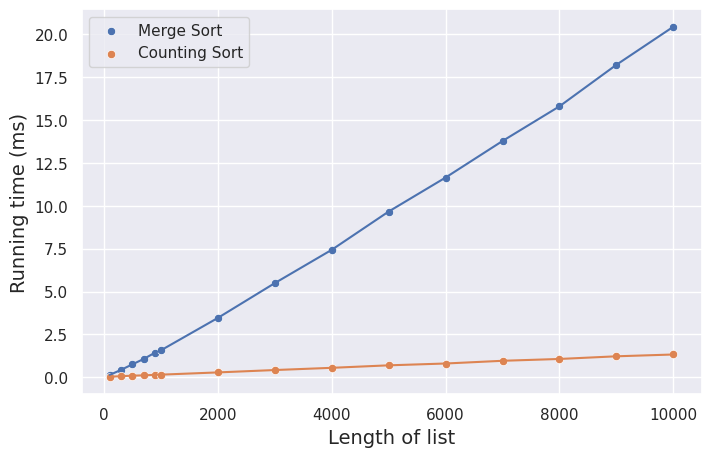

In [70]:
# Plot the time taken for the two functions
plt.figure(figsize=(8, 5))

sns.scatterplot(x=lengths, y=ms_times, label='Merge Sort')
sns.scatterplot(x=lengths, y=cs_times, label='Counting Sort')
sns.lineplot(x=lengths, y=ms_times)
sns.lineplot(x=lengths, y=cs_times)

plt.xlabel('Length of list', size=14)
plt.ylabel('Running time (ms)', size=14)

plt.legend()

plt.show()

### Optimization

Since the range of our values is fixed, we can hard-code it inside our function. In order to do so, we have to assume a slightly larger range than the actual one to be safe. 

Be careful, hard-coding the past years is not a problem, while hard-coding the current year is a problem because it changes every year. In a real-world scenario it is better to obtain the upper-bound of our years range from an outside source so it updates automatically.

In [71]:
def opt_counting_sort(arr):
    # Find maximum and minimum values
    max_val = 2024
    min_val = 1850
    # Create a list to store the count of each element
    count = [0] * (max_val - min_val + 1) # O(1)
    # Count the occurrences of each element 
    for i in arr: # O(n)
        count[i - min_val] += 1
    # Reconstruct the array
    index = 0 
    for i in range(len(count)): # O(1)
        for j in range(count[i]): # O(n)
            arr[index] = i + min_val
            index += 1
    return arr

In [72]:
# Test both functions on random lists of different lengths. For each length, we average over n_trials runs.
lengths = range(1000, 10001, 1000)
cs_times = []
ocs_times = []
n_trials = 50
for length in lengths:
    # Generate random lists without repetitions
    lst = random_list(length, 1900, 2024)
    cs_time = 0
    ocs_time = 0
    for _ in range(n_trials):
        cs_time += time_function(counting_sort, [lst])
        ocs_time += time_function(opt_counting_sort, [lst])
    cs_times.append(cs_time / n_trials)
    ocs_times.append(ocs_time / n_trials)

In [73]:
# Rescale the times to milliseconds
cs_times = [t * 1e3 for t in cs_times]
ocs1_times = [t * 1e3 for t in ocs_times]

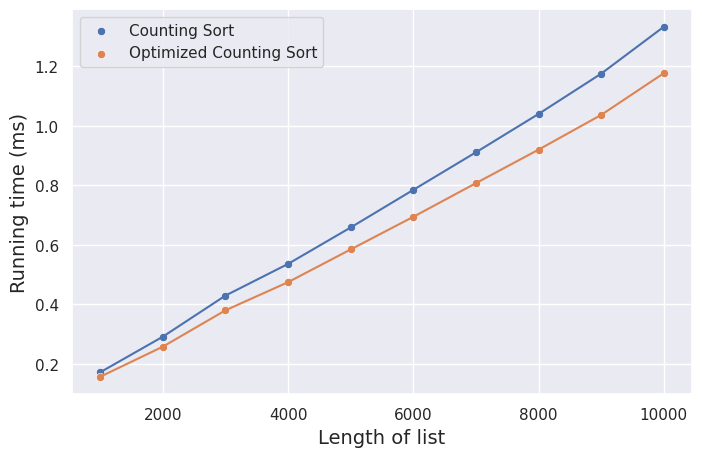

In [74]:
# Plot the time taken for the two functions
plt.figure(figsize=(8, 5))

sns.scatterplot(x=lengths, y=cs_times, label='Counting Sort')
sns.scatterplot(x=lengths, y=ocs1_times, label='Optimized Counting Sort')
sns.lineplot(x=lengths, y=cs_times)
sns.lineplot(x=lengths, y=ocs1_times)

plt.xlabel('Length of list', size=14)
plt.ylabel('Running time (ms)', size=14)

plt.legend()

plt.show()

### Comparison on generic arrays

In [75]:
# Test both functions on random lists of different lengths. For each length, we average over n_trials runs.
lengths = list(range(100, 1000, 200)) + list(range(1000, 10001, 1000))
ms_times = []
cs_times = []
n_trials = 50
for length in lengths:
    # Generate random lists without repetitions
    lst = random_list(length, 0, 1000000)
    ms_time = 0
    cs_time = 0
    for _ in range(n_trials):
        ms_time += time_function(merge_sort, [lst])
        cs_time += time_function(counting_sort, [lst])
    ms_times.append(ms_time / n_trials)
    cs_times.append(cs_time / n_trials)

In [76]:
# Rescale the times to milliseconds
ms_times = [t * 1e3 for t in ms_times]
cs_times = [t * 1e3 for t in cs_times]

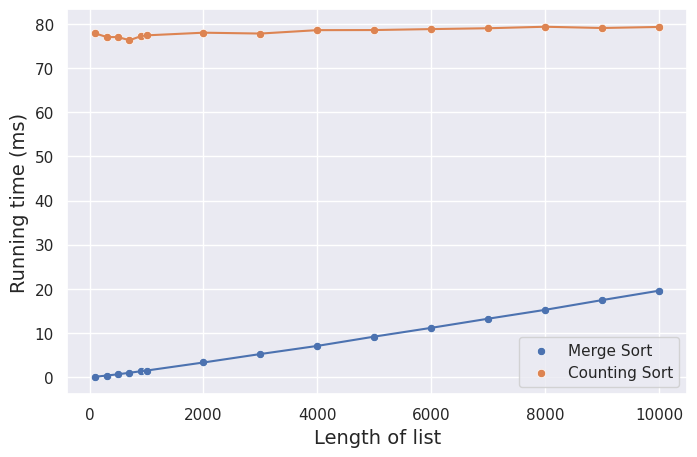

In [77]:
# Plot the time taken for the two functions
plt.figure(figsize=(8, 5))

sns.scatterplot(x=lengths, y=ms_times, label='Merge Sort')
sns.scatterplot(x=lengths, y=cs_times, label='Counting Sort')
sns.lineplot(x=lengths, y=ms_times)
sns.lineplot(x=lengths, y=cs_times)

plt.xlabel('Length of list', size=14)
plt.ylabel('Running time (ms)', size=14)

plt.legend()

plt.show()